### SDSS Data

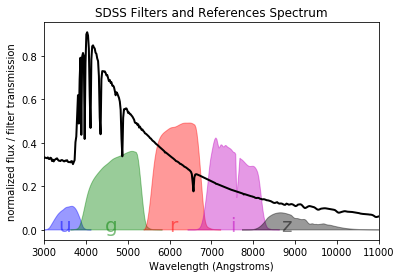

In [22]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_filter, fetch_vega_spectrum

# Set up figure and axes
fig = plt.figure()
ax = fig.add_subplot(111)

# Fetch and plot the Vega spectrum
spec = fetch_vega_spectrum()
lam = spec[0]
spectrum = spec[1] / 1.1 / spec[1].max()
ax.plot(lam, spectrum, '-k', lw = 2)

# Fetch an dplot the five filters
text_kwargs = dict(fontsize = 20, ha = 'center', va='center', alpha = 0.5)

for f, c, loc in zip('ugriz', 'bgrmk', [3500, 4600, 6100, 7500, 8800]):
    data = fetch_sdss_filter(f)
    ax.fill(data[0], data[1], ec = c, fc = c, alpha = 0.4)
    ax.text(loc, 0.02, f, color = c, **text_kwargs)
    
ax.set_xlim(3000, 11000)

ax.set_title('SDSS Filters and References Spectrum')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('normalized flux / filter transmission')

plt.show()

### SDSS Spectra

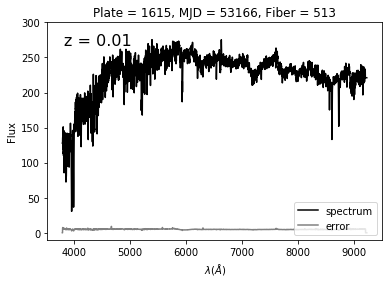

In [26]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

# Fetching single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

# Plot the resulting spectrum
ax = plt.axes()
ax.plot(spec.wavelength(), spec.spectrum, '-k', label = 'spectrum')
ax.plot(spec.wavelength(), spec.error, '-', color = 'gray', label = 'error')

ax.legend(loc = 4)

ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % spec.z, size = 16,
       ha = 'left', va = 'top', transform = ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

ax.set_ylim(-10, 300)

plt.show()

### SDSS Galaxy Colors

querying for 50000 objects
SELECT TOP 50000
  p.u, p.g, p.r, p.i, p.z, s.class, s.z, s.zerr
FROM PhotoObj AS p
  JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
  p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 20
  AND s.class <> 'UNKNOWN'
  AND s.class <> 'STAR'
  AND s.class <> 'SKY'
  AND s.class <> 'STAR_LATE'
finished.


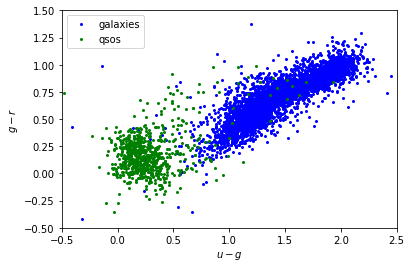

In [27]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_galaxy_colors

# Download data
data = fetch_sdss_galaxy_colors()
data = data[::10]   # truncate for plotting

# Extract colors and spectral class
ug = data['u'] - data['g']
gr = data['g'] - data['r']
spec_class = data['specClass']

galaxies = (spec_class == 'GALAXY')
qsos = (spec_class == 'QSO')

# Prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)

ax.plot(ug[galaxies], gr[galaxies], '.', ms = 4, c = 'b', label = 'galaxies')
ax.plot(ug[qsos], gr[qsos], '.', ms = 4, c = 'g', label = 'qsos')

ax.legend(loc = 2)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

plt.show()

### Downloading and processing spectra

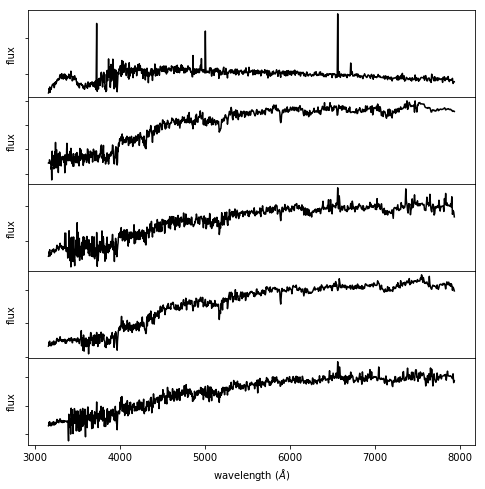

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from astroML.datasets import sdss_corrected_spectra

# Fectch the data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)

# Plot several spectra
fig = plt.figure(figsize = (8, 8))

fig.subplots_adjust(hspace = 0)

for i in range(5):
    ax = fig.add_subplot(511 + i)
    ax.plot(lam, spectra[i], '-k')
    
    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength $(\AA)$')
        
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylabel('flux')
    
plt.show()

### SDSS Line - ration Diagrams

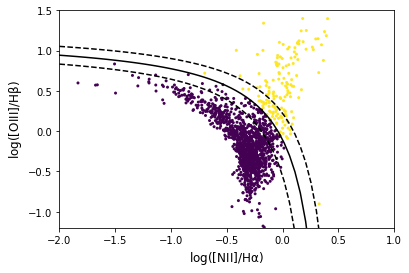

In [33]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets.tools.sdss_fits import log_OIII_Hb_NII

data = fetch_sdss_corrected_spectra()

i = np.where((data['lineindex_cln'] == 4) | (data['lineindex_cln'] == 5))

plt.scatter(data['log_NII_Ha'][i], data['log_OIII_Hb'][i],
           c = data['lineindex_cln'][i], s = 9, lw = 0)

NII = np.linspace(-2.0, 0.35)
plt.plot(NII, log_OIII_Hb_NII(NII), '-k')
plt.plot(NII, log_OIII_Hb_NII(NII, 0.1), '--k')
plt.plot(NII, log_OIII_Hb_NII(NII, -0.1), '--k')
plt.xlim(-2.0, 1.0)
plt.ylim(-1.2, 1.5)

plt.xlabel(r'$\mathrm{log([NII]/H\alpha)}$', fontsize = 'large')
plt.ylabel(r'$\mathrm{log([OIII]/H\beta)}$', fontsize = 'large')
plt.show()

### SDSS Spectroscopic Galaxy Sample

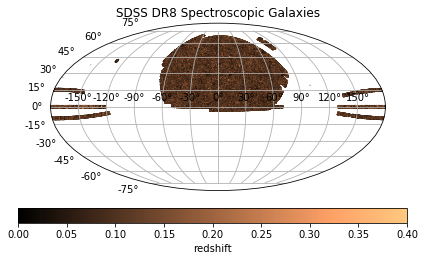

<Figure size 432x288 with 0 Axes>

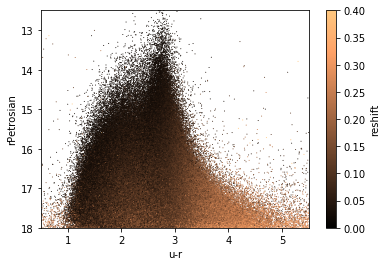

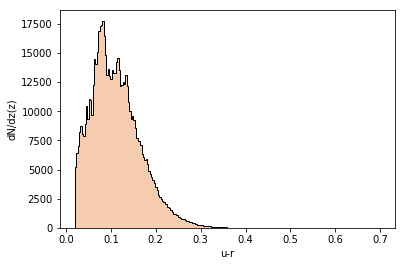

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import hist
from astroML.datasets import fetch_sdss_specgals

data = fetch_sdss_specgals()

# plot the RA/DEC in an area-preserving projection

RA = data['ra']
DEC = data['dec']

# convert coordinates to degrees
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180

ax = plt.axes(projection = 'mollweide')

ax.grid()
plt.scatter(RA, DEC, s=1, lw=0, c=data['z'], cmap=plt.cm.copper,
            vmin=0, vmax=0.4)

plt.title('SDSS DR8 Spectroscopic Galaxies')
cb = plt.colorbar(cax = plt.axes([0.05, 0.1, 0.9, 0.05]),
                 orientation = 'horizontal',
                 ticks = np.linspace(0, 0.4, 9))
cb.set_label('redshift')


# Plot the r vs u-r color-magnitude diagram
u = data['modelMag_u']
r = data['modelMag_r']
rpetro = data['petroMag_r']

plt.figure()
ax = plt.figure()
plt.scatter(u - r, rPetro, s=1, lw=0, c = data['z'], cmap = plt.cm.copper,
           vmin = 0, vmax = 0.4)
plt.colorbar(ticks = np.linspace(0, 0.4, 9)).set_label('reshift')

plt.xlim(0.5, 5.5)
plt.ylim(18, 12.5)

plt.xlabel('u-r')
plt.ylabel('rPetrosian')


# plot a histogram of the redshift

plt.figure()
hist(data['z'], bins = 'knuth',
    histtype = 'stepfilled', ec = 'k', fc = '#F5CCB0')
plt.xlabel('u-r')
plt.ylabel('dN/dz(z)')

plt.show()

### SDSS 'Great Wall'

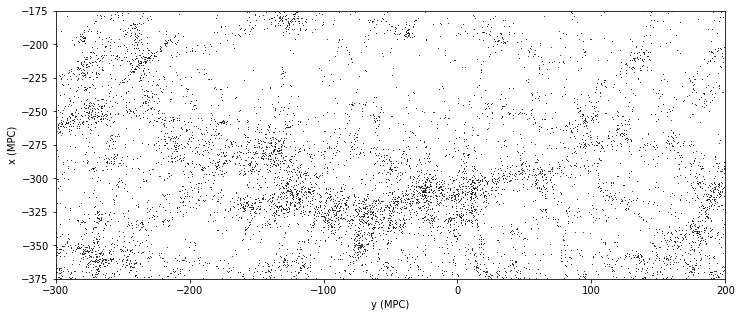

In [48]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_great_wall
from astroML.density_estimation import KNeighborsDensity

# Fetch the great wall data
X = fetch_great_wall()

# Plot the results
fig = plt.figure(figsize=(12, 8))

# First plot: scatter the points
ax = plt.subplot(111, aspect = 'equal')
ax.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')

ax.set_xlim(-300, 200)
ax.set_ylim(-375, -175)

ax.set_xlabel('y (MPC)')
ax.set_ylabel('x (MPC)')

plt.show()

### SDSS Quasar catalog

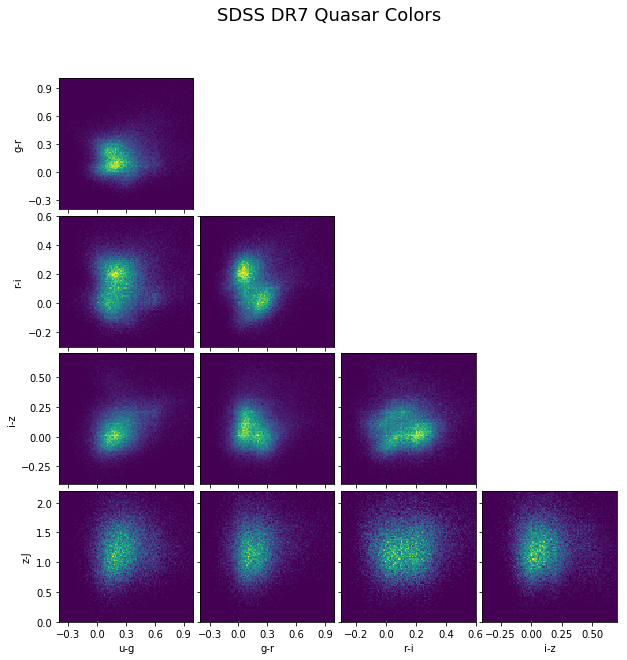

In [53]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.plotting import MultiAxes
from astroML.datasets import fetch_dr7_quasar

data = fetch_dr7_quasar()

colors = np.empty((len(data), 5))

colors[:, 0] = data['mag_u'] - data['mag_g']
colors[:, 1] = data['mag_g'] - data['mag_r']
colors[:, 2] = data['mag_r'] - data['mag_i']
colors[:, 3] = data['mag_i'] - data['mag_z']
colors[:, 4] = data['mag_z'] - data['mag_J']

labels = ['u-g', 'g-r', 'r-i', 'i-z', 'z-J']

bins = [np.linspace(-0.4, 1.0, 100),
       np.linspace(-0.4, 1.0, 100),
       np.linspace(-0.3, 0.6, 100),
       np.linspace(-0.4, 0.7, 100),
       np.linspace(0, 2.2, 100)]

ax = MultiAxes(5, wspace=0.05, hspace=0.05,
              fig = plt.figure(figsize=(10, 10)))

ax.density(colors, bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))
plt.suptitle('SDSS DR7 Quasar Colors', fontsize = 18)

plt.show()

### SDSS Imaging

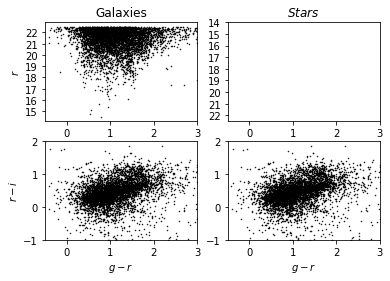

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_imaging_sample

# Get star/galaxy data
data = fetch_imaging_sample()

objtype = data['type']

stars = data[objtype == 6][:5000]
galaxies = data[objtype == 3][:5000]

# Plot the stars and galaxies
plot_kwargs = dict(color = 'k', linestyle = 'none', marker = '.', markersize = 1)

fig = plt.figure()

ax1 = fig.add_subplot(221)
ax1.plot(galaxies['gRaw'] - galaxies['rRaw'],
        galaxies['rRaw'],
        **plot_kwargs)

ax2 = fig.add_subplot(223, sharex = ax1)
ax2.plot(galaxies['gRaw'] - galaxies['rRaw'],
        galaxies['rRaw'] - galaxies['iRaw'],
        **plot_kwargs)

ax3 = fig.add_subplot(222, sharex = ax1)
ax3.plot(galaxies['gRaw'] - galaxies['rRaw'],
        galaxies['rRaw'] - galaxies['iRaw'],
        **plot_kwargs)


ax4 = fig.add_subplot(224, sharex = ax3, sharey = ax2)
ax4.plot(galaxies['gRaw'] - galaxies['rRaw'],
        galaxies['rRaw'] - galaxies['iRaw'],
        **plot_kwargs)

# set labels and titles
ax1.set_ylabel('$r$')
ax2.set_ylabel('$r-i$')
ax2.set_xlabel('$g-r$')
ax4.set_xlabel('$g-r$')
ax1.set_title('Galaxies')
ax3.set_title('$Stars$')

# set axis limits
ax2.set_xlim(-0.5, 3)
ax3.set_ylim(22.5, 14)
ax4.set_xlim(-0.5, 3)
ax4.set_ylim(-1, 2)

# set axis limits
ax2.set_xlim(-0.5, 3)
ax3.set_ylim(22.5, 14)
ax4.set_xlim(-0.5, 3)
ax4.set_ylim(-1, 2)

# adjust tick spacings on all axes
for ax in (ax1, ax2, ax3, ax4):
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    
plt.show()

### SDSS Segue Stellar Parameters Pipeline

/home/lokesh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/home/lokesh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log10


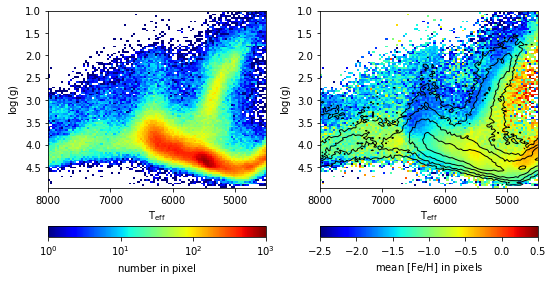

In [72]:
import numpy as np
from matplotlib import pyplot as plt

# Get SDSS SSPP data
from astroML.datasets import fetch_sdss_sspp
data = fetch_sdss_sspp()

# do some reasonable magnitude cuts
rpsf = data['rpsf']
data = data[(rpsf > 15) & (rpsf < 19)]

# get the desired data
logg = data['logg']
Teff = data['Teff']
FeH = data['FeH']

# Plot the results using the binned_statistic function
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(Teff, logg, FeH, 
                                       'count', bins = 100)

FeH_mean, xedges, yedges = binned_statistic_2d(Teff, logg, FeH, 
                                               'mean', bins = 100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.jet
cmap.set_bad('w', 1.0)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.0)

# Create figure and subplots
fig = plt.figure(figsize = (8, 4))
fig.subplots_adjust(wspace= 0.25, left= 0.1, right = 0.95, 
                   bottom = 0.07, top = 0.95)

# First axes:
plt.subplot(121, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(np.log10(N.T), origin='lower',
          extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]],
          aspect = 'auto', interpolation = 'nearest', cmap = cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks = [0, 1, 2, 3],
                 format = r'$10^{%i}$', orientation = 'horizontal')

cb.set_label(r'$\mathrm{number\ in\ pixel}$')
plt.clim(0, 3)

# Third axes:
plt.subplot(122, xticks = [4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin = 'lower',
          extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]],
          aspect = 'auto', interpolation = 'nearest', cmap = cmap_multicolor)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks = np.arange(-2.5, 1, 0.5),
                 format = r'$%.1f$', orientation = 'horizontal')

cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixels}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors = 'k', linewidths= 1, 
           extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.show()


### Stripe 82 : Time Domain

#### RR-Lyrae Magnitudes

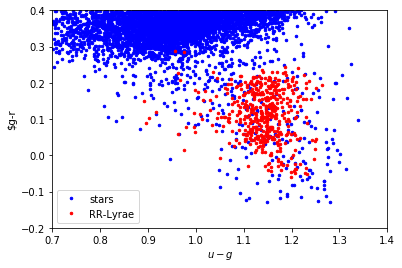

In [75]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_rrlyrae_combined

# get data and split into training & testing sets

X, y = fetch_rrlyrae_combined()

X = X[-5000:]
y = y[-5000:]

stars = (y == 0)
rrlyrae = (y == 1)

# plot the results
ax = plt.axes()

ax.plot(X[stars, 0], X[stars, 1], '.', ms = 5, c = 'b', label = 'stars')
ax.plot(X[rrlyrae, 0], X[rrlyrae, 1], '.', ms = 5, c = 'r', label = 'RR-Lyrae')

ax.legend(loc = 3)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r')

ax.set_xlim(0.7, 1.4)
ax.set_ylim(-0.2, 0.4)

plt.show()

#### SDSS Moving Object Calalog

downloading moving object catalog from https://github.com/astroML/astroML-data/raw/master/datasets/ADR3.dat.gz to /home/lokesh/astroML_data
[=========================================]  25.33Mb / 25.33Mb   
uncompressing file...


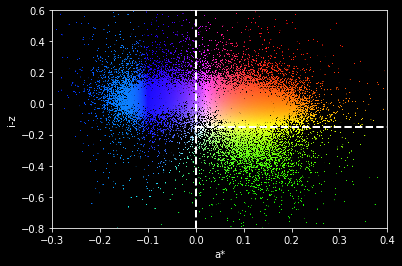

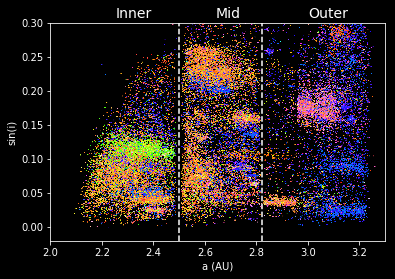

In [76]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from astroML.datasets import fetch_moving_objects
from astroML.plotting.tools import devectorize_axes

def black_bg_subplot(*args, **kwargs):
    """Create a subplot with black background"""
    
    if int(matplotlib.__version__[0]) >= 2:
        kwargs['facecolor'] = 'k'
    else:
        kwargs['axisbg'] = 'k'
        
    ax = plt.subplot(*args, **kwargs)
    
    # set ticks and labels to white
    for spine in ax.spines.values():
        spine.set_color('w')
        
    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        for child in tick.get_children():
            child.set_color('w')
            
    return ax


def compute_color(mag_a, mag_i, mag_z, a_crit = -0.1):
    
    R = np.ones_like(mag_i)
    G = 0.5 * 10 ** (-2 * (mag_i - mag_z - 0.01))
    B = 1.5 * 10 ** (-8 * (mag_a  + 0.0))
    
    # enhance green beyond the a_crit cutoff
    i = np.where(mag_a < a_crit)
    G[i] += 10000 * (10 ** (-0.01 * (mag_a[i] - a_crit)) - 1)
    
    # normalize color of each point to its maximum component
    RGB = np.vstack([R, G, B])
    RGB /= RGB.max(0)
    
    # return an array of RGB colors, which is shape (n_points, 3)
    return RGB.T


# Fectch data and extract the desired quantities
data = fetch_moving_objects(Parker2008_cuts = True)
mag_a = data['mag_a']
mag_i = data['mag_i']
mag_z = data['mag_z']
a = data['aprime']
sini = data['sin_iprime']

# dither: magnitudes are recorded only to +/- 0.01
mag_a += -0.005 + 0.01 * np.random.random(size = mag_a.shape)
mag_i += -0.005 + 0.01 * np.random.random(size = mag_i.shape)
mag_z += -0.005 + 0.01 * np.random.random(size = mag_z.shape)

# compute RGB color bvased on magnitudes
color = compute_color(mag_a, mag_i, mag_z)

# plot the color-magnitude plot
fig = plt.figure(facecolor = 'k')
ax = black_bg_subplot(111)
ax.scatter(mag_a, mag_i - mag_z,
          c = color, s = 1, lw = 0)
devectorize_axes(ax, dpi = 400)

ax.plot([0, 0], [-0.8, 0.6], '--w', lw = 2)
ax.plot([0, 0.4], [-0.15, -0.15], '--w', lw = 2)

ax.set_xlim(-0.3, 0.4)
ax.set_ylim(-0.8, 0.6)

ax.set_xlabel('a*', color='w')
ax.set_ylabel('i-z', color='w')

# plot the orbital parameters plot
fig = plt.figure(facecolor = 'k')
ax = black_bg_subplot(111)
ax.scatter(a, sini,
          c = color, s = 1, lw = 0)
devectorize_axes(ax, dpi = 400)

ax.plot([2.5, 2.5], [-0.02, 0.3], '--w')
ax.plot([2.82, 2.82], [-0.02, 0.3], '--w')

ax.set_xlim(2.0, 3.3)
ax.set_ylim(-0.02, 0.3)

ax.set_xlabel('a (AU)', color='w')
ax.set_ylabel('sin(i)', color='w')

# label the plot
text_kwargs = dict(color = 'w', fontsize = 14,
                  transform = plt.gca().transAxes,
                  ha = 'center', va = 'bottom')

ax.text(0.25, 1.01, 'Inner', **text_kwargs)
ax.text(0.53, 1.01, 'Mid', **text_kwargs)
ax.text(0.83, 1.01, 'Outer', **text_kwargs)


plt.show()

### SDSS Standard Star Catalogue

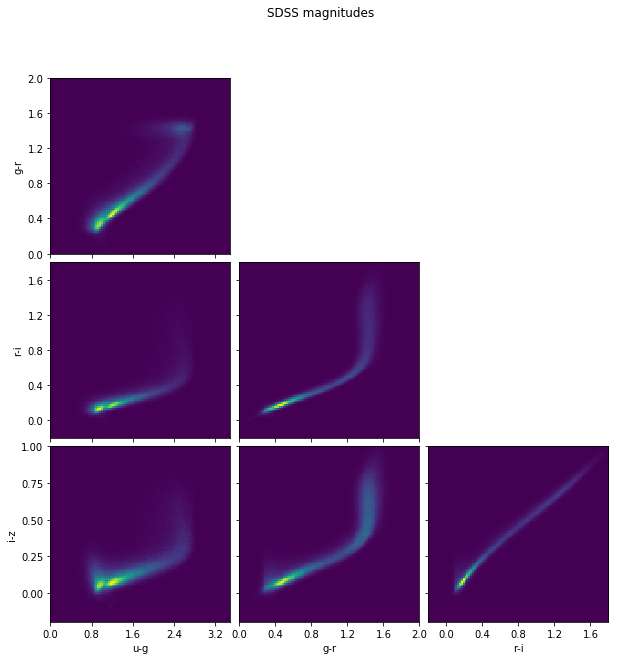

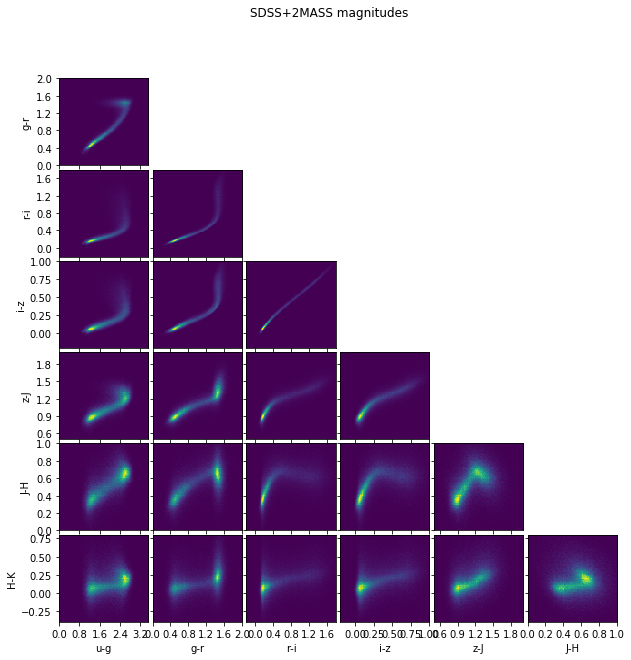

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_S82standards
from astroML.plotting import MultiAxes

# plot SDSS data alone
data = fetch_sdss_S82standards()

colors = np.zeros((len(data), 4))

colors[:, 0] = data['mmu_u'] - data['mmu_g']
colors[:, 1] = data['mmu_g'] - data['mmu_r']
colors[:, 2] = data['mmu_r'] - data['mmu_i']
colors[:, 3] = data['mmu_i'] - data['mmu_z']

labels = ['u-g', 'g-r', 'r-i', 'i-z']

bins = [np.linspace(0.0, 3.5, 100),
       np.linspace(0, 2, 100),
       np.linspace(-0.2, 1.8, 100),
       np.linspace(-0.2, 1.0, 100)]

fig = plt.figure(figsize=(10, 10))
ax = MultiAxes(4, hspace= 0.05, wspace= 0.05, fig = fig)

ax.density(colors, bins = bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))
plt.suptitle('SDSS magnitudes')

# Plot datacross-matched with 2MASS
data = fetch_sdss_S82standards(crossmatch_2mass=True)

colors = np.zeros((len(data), 7))

colors[:, 0] = data['mmu_u'] - data['mmu_g']
colors[:, 1] = data['mmu_g'] - data['mmu_r']
colors[:, 2] = data['mmu_r'] - data['mmu_i']
colors[:, 3] = data['mmu_i'] - data['mmu_z']
colors[:, 4] = data['mmu_z'] - data['J']
colors[:, 5] = data['J'] - data['H']
colors[:, 6] = data['H'] - data['K']

labels = ['u-g', 'g-r', 'r-i', 'i-z', 'z-J', 'J-H', 'H-K']

bins = [np.linspace(0.0, 3.5, 100),
       np.linspace(0, 2, 100),
       np.linspace(-0.2, 1.8, 100), 
       np.linspace(-0.2, 1.0, 100),
       np.linspace(0.5, 2.0, 100),
       np.linspace(0.0, 1.0, 100),
       np.linspace(-0.4, 0.8, 100)]

fig = plt.figure(figsize=(10, 10))
ax = MultiAxes(7, hspace=0.05, wspace=0.05, fig=fig)

ax.density(colors, bins = bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))

fig.suptitle('SDSS+2MASS magnitudes')
plt.show()

### Combined Surveys

#### Nasa Sloan Atlas

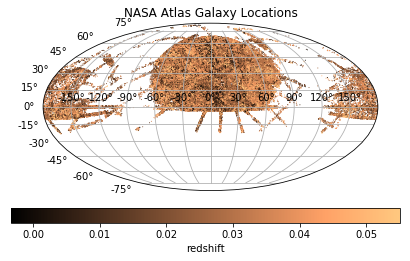

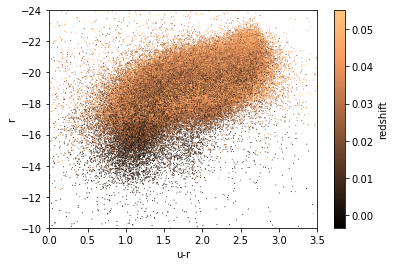

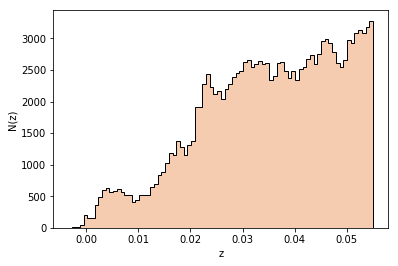

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.visualization import hist

from astroML.datasets import fetch_nasa_atlas

data = fetch_nasa_atlas()

# Plot the RA/DEC in an area-preserving projection

RA = data['RA']
DEC = data['DEC']

# convert coordinates to degrees
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180

ax = plt.axes(projection = 'mollweide')
plt.scatter(RA, DEC, s=1, c = data['Z'], cmap = plt.cm.copper,
           edgecolors = 'none', linewidths=0)
plt.grid(True)

plt.title('NASA Atlas Galaxy Locations')
cb = plt.colorbar(cax = plt.axes([0.05, 0.1, 0.9, 0.05]),
                 orientation = 'horizontal', 
                 ticks = np.linspace(0, 0.05, 6))
cb.set_label('redshift')

#plot the r vs u-r color-magnitude diagram

absmag = data['ABSMAG']

u = absmag[:, 2]
r = absmag[:, 4]

plt.figure()
ax = plt.axes()
plt.scatter(u - r, r, s=1, lw=0, c = data['Z'], cmap = plt.cm.copper)
plt.colorbar(ticks = np.linspace(0, 0.05, 6)).set_label('redshift')

plt.xlim(0, 3.5)
plt.ylim(-10, -24)

plt.xlabel('u-r')
plt.ylabel('r')


# plot a histogram of the redshift

plt.figure()
hist(data['Z'], bins = 'knuth',
    histtype = 'stepfilled', ec = 'k', fc = '#F5CCB0')
plt.xlabel('z')
plt.ylabel('N(z)')

plt.show()

#### Stripe 82 Standards + 2MASS

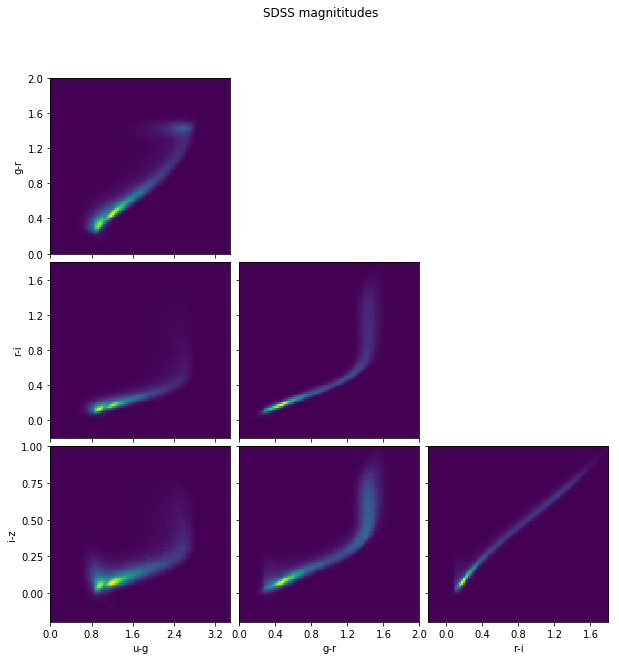

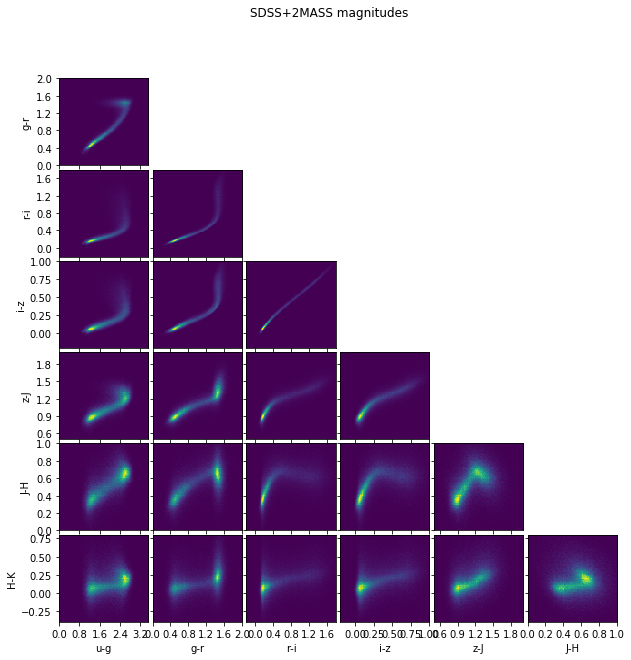

In [9]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_sdss_S82standards

from astroML.plotting import MultiAxes

# plot SDSS data alone
data = fetch_sdss_S82standards()

colors = np.zeros((len(data), 4))

colors[:, 0] = data['mmu_u'] - data['mmu_g']
colors[:, 1] = data['mmu_g'] - data['mmu_r']
colors[:, 2] = data['mmu_r'] - data['mmu_i']
colors[:, 3] = data['mmu_i'] - data['mmu_z']

labels = ['u-g', 'g-r', 'r-i', 'i-z']

bins = [np.linspace(0.0, 3.5, 100),
       np.linspace(0, 2, 100),
       np.linspace(-0.2, 1.8, 100),
       np.linspace(-0.2, 1.0, 100)]

fig = plt.figure(figsize=(10, 10))
ax = MultiAxes(4, hspace = 0.05, wspace = 0.05, fig = fig)

ax.density(colors, bins=bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))
plt.suptitle('SDSS magnititudes')

# Plot datacross-mathced with 2MASS
data = fetch_sdss_S82standards(crossmatch_2mass= True)

colors = np.zeros((len(data), 7))

colors[:, 0] = data['mmu_u'] - data['mmu_g']
colors[:, 1] = data['mmu_g'] - data['mmu_r']
colors[:, 2] = data['mmu_r'] - data['mmu_i']
colors[:, 3] = data['mmu_i'] - data['mmu_z']
colors[:, 4] = data['mmu_z'] - data['J']
colors[:, 5] = data['J'] - data['H']
colors[:, 6] = data['H'] - data['K']

labels = ['u-g', 'g-r', 'r-i', 'i-z', 'z-J', 'J-H', 'H-K']

bins = [np.linspace(0.0, 3.5, 100),
       np.linspace(0, 2, 100),
       np.linspace(-0.2, 1.8, 100),
       np.linspace(-0.2, 1.0, 100),
       np.linspace(0.5, 2.0, 100),
       np.linspace(0.0, 1.0, 100),
       np.linspace(-0.4, 0.8, 100)]

fig = plt.figure(figsize=(10, 10))
ax = MultiAxes(7, hspace = 0.05, wspace = 0.05, fig = fig)

ax.density(colors, bins = bins)
ax.set_labels(labels)
ax.set_locators(plt.MaxNLocator(5))

fig.suptitle('SDSS+2MASS magnitudes')
plt.show()

### Time Domain Data

#### RR Lyrae Templates

[=========================================]  168.7kb / 168.7kb   


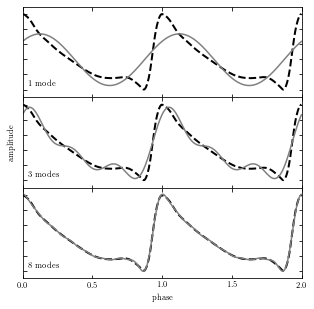

In [10]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_rrlyrae_templates

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Load the RR Lyrae template
templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T

# Plot the results
fig = plt.figure(figsize = (5, 5))
fig.subplots_adjust(hspace=0)

kvals = [1, 3, 8]
subplots = [311, 312, 313]

for (k, subplot) in zip(kvals, subplots):
    ax = fig.add_subplot(subplot)
    
    # Use FFT to fit a truncated Fourier series
    y_fft = np.fft.fft(y)
    y_fft[k + 1: -k] = 0
    y_fit = np.fft.ifft(y_fft).real
    
    # plot the true value and the k-term reconstruction
    ax.plot(np.concatenate([x, 1 + x]),
           np.concatenate([y, y]), '--k', lw = 2)
    ax.plot(np.concatenate([x, 1 + x]),
           np.concatenate([y_fit, y_fit]), color = 'gray')
    
    label = "%i mode" % k
    if k > 1:
        label += 's'
        
    ax.text(0.02, 0.1, label, ha = 'left', va = 'bottom',
           transform = ax.transAxes)
    
    if subplot == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    
    if subplot == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    
    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)
    
plt.show()

#### Phased LINEAR Light Curve

@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
 - computing power for 14752041 (253 points)


        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


 - computing power for 1009459 (593 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 11375941 (280 points)
 - computing power for 18525697 (211 points)
 - omega_0 = 17.21695506
 - omega_0 = 51.10600808
 - omega_0 = 10.20062676
 - omega_0 = 45.55493503
 - omega_0 = 58.44512277
 - omega_0 = 10.82722772


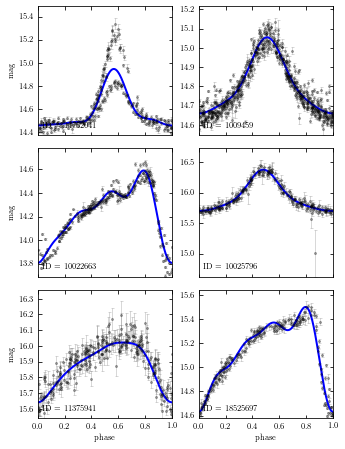

In [17]:
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex = True)
import matplotlib
matplotlib.rc('_internal', classic_mode = True)

# Load dataset
data = fetch_LINEAR_sample()
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]

# compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval = 10000, n_retry= 5, generalized = True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for {0} ({1} points)".format(i, len(t)))
        kwargs = dict(generalized = generalized)
        omega, power = search_frequencies(t, y, dy, n_eval = n_eval,
                                         n_retry = n_retry,
                                         LS_kwargs = kwargs)
        results[i] = [omega, power]
    
    return results

results = compute_best_frequencies(ids, n_eval = 10000, n_retry = 5)

# Plot the phased light-curves
fig = plt.figure(figsize=(5, 6.5))
fig.subplots_adjust(hspace=0.1, bottom = 0.06, top = 0.94, left = 0.12, right = 0.94)

for i in range(6):
    # get data and the best-fit angualr frequency
    t, y, dy = data[ids[i]].T
    omega, power = results[ids[i]]
    omega_best = omega[np.argmax(power)]
    print(" - omega_0 = %.10g" % omega_best)
    
    # do a fit to the first 4 Fourier components
    mtf = MultiTermFit(omega_best, 4)
    mtf.fit(t, y, dy)
    phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times = True)
    
    # plot the phased data and best-fit curves
    ax = fig.add_subplot(321 + i)
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor= 'gray',
               lw = 1, ms = 4, capsize = 1.5, alpha = 0.3)
    ax.plot(phase_fit, y_fit, 'b', markeredgecolor = 'b', lw = 2, fillstyle = 'top', linestyle = 'solid')
    
    ax.text(0.03, 0.04, "ID = %i" % ids[i], ha  = 'left', va = 'bottom',
            transform = ax.transAxes)
    
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))
    
    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        
    if i%2 == 0:
        ax.set_ylabel('mag')
        
    if i in (4, 5):
        ax.set_xlabel('phase')
        
        
plt.show()

#### LIGO Data

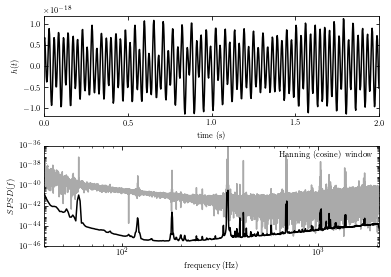

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
from matplotlib import mlab

from astroML.datasets import fetch_LIGO_large

# Fetch the LIGO handford data
data, dt = fetch_LIGO_large()

# subset of the data to plot
t0 = 646
T = 2
tplot = dt * np.arange(T * 4096)
dplot = data[4096 * t0: 4096 * (t0 + T)]

tplot = tplot[::10]
dplot = dplot[::10]

fmin = 40
fmax = 2060

# compute PSD using simple FFT
N = len(data)
df = 1. / (N * dt)
PSD = abs(dt * fftpack.fft(data)[:N // 2]) ** 2
f = df * np.arange(N / 2)

cutoff = ((f >= fmin) & ( f <= fmax))
f= f[cutoff]
PSD = PSD[cutoff]
f = f[::100]
PSD = PSD[::100]

# compute PSD using Welch's method -- hanning window function
PSDW2, fW2 = mlab.psd(data, NFFT= 4096, Fs = 1. / dt, 
                     window = mlab.window_hanning, noverlap = 2048)

dfW2 = fW2[1] - fW2[0]

cutoff = ((fW2 >= fmin) & ( fW2 <= fmax))
fW2= fW2[cutoff]
PSDW2 = PSDW2[cutoff]

# Plot the data
fig = plt.figure()
fig.subplots_adjust(bottom= 0.1, top= 0.9, hspace = 0.3)

# top panel: time series
ax = fig.add_subplot(211)
ax.plot(tplot, dplot, '-k')
ax.set_xlabel('time (s)')
ax.set_ylabel('$h(t)$')

ax.set_ylim(-1.2E-18, 1.2E-18)

# bottom panel: hanning window
ax = fig.add_subplot(212)
ax.loglog(f, PSD, '-', c='#AAAAAA')
ax.loglog(fW2, PSDW2, '-k')
ax.text(0.98, 0.95, "Hanning (cosine) window", 
       ha = 'right', va = 'top', transform= ax.transAxes)

ax.set_xlabel('frequency (Hz)')
ax.set_ylabel(r'$SPSD(f)$')

ax.set_xlim(40, 2060)
ax.set_ylim(1E-46, 1E-36)
ax.yaxis.set_major_locator(plt.LogLocator(base = 100))

plt.show()

#### WMAP temperature map

/home/lokesh/.local/lib/python3.5/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/lokesh/.local/lib/python3.5/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/lokesh/.local/lib/python3.5/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/lokesh/.local/lib/python3.5/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/home/lokesh/.local/lib/python3.5/si

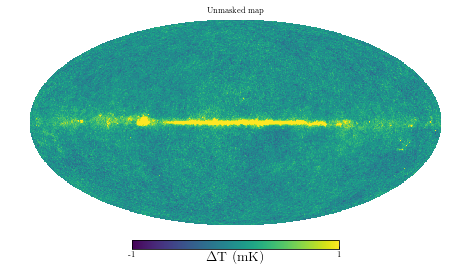

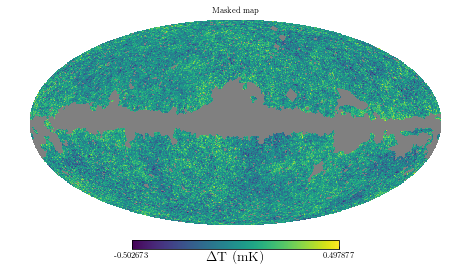

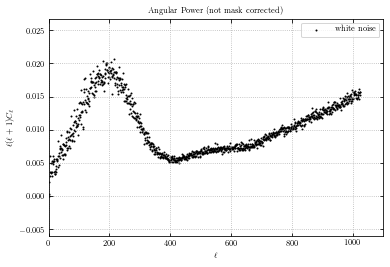

In [27]:
import numpy as np
from matplotlib import pyplot as plt

import healpy as hp

from astroML.datasets import fetch_wmap_temperatures

wmap_unmasked = fetch_wmap_temperatures

wmap_unmasked = fetch_wmap_temperatures(masked = False)
wmap_masked = fetch_wmap_temperatures(masked = True)
white_noise = np.ma.asarray(np.random.normal(0, 0.062, wmap_masked.shape))

# plot the unmasked map
fig = plt.figure(1)
hp.mollview(wmap_unmasked, min = -1, max = 1, title = 'Unmasked map', 
           fig = 1, unit = r'$\Delta$T (mK)')

# plto the masked map
fig = plt.figure(2)
hp.mollview(wmap_masked.filled(), title = 'Masked map', 
           fig = 2, unit = r'$\Delta$T (mK)')

# compute and plot the power spectrum
cl = hp.anafast(wmap_masked.filled(), lmax = 1024)
ell = np.arange(len(cl))

cl_white = hp.anafast(white_noise, lmax = 1024)

fig = plt.figure(3)
ax = fig.add_subplot(111)
ax.scatter(ell, ell * (ell + 1) * cl, 
          s = 4, c = 'black', lw = 0,
          label = 'white noise')

ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1)C_\ell$')
ax.set_title('Angular Power (not mask corrected)')
ax.legend(loc = 'upper right')
ax.grid()
ax.set_xlim(0, 1100)

plt.show()